# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


/Users/sergioescobedo/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 569


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url= f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S') #Time of data calculation, unix, UTC

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")




Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | barreiro do jaiba
Processing Record 5 of Set 1 | faya-largeau
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | lisala
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | haiku-pauwela
Processing Record 12 of Set 1 | taiohae
City not found. Skipping...
Processing Record 13 of Set 1 | petropavlovsk-kamchatsky
Processing Record 14 of Set 1 | vilyuysk
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | olonkinbyen
Processing Record 17 of Set 1 | bikin
Processing Record 18 of Set 1 | isafjordur
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | talnakh
Processing Record 21 of

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          541
Lat           541
Lng           541
Max Temp      541
Humidity      541
Cloudiness    541
Wind Speed    541
Country       541
Date          541
dtype: int64

In [6]:
# Show the first few rows of the DataFrame

city_data_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,14.16,82,0,7.20,ZA,2023-08-08 03:33:31
1,port-aux-francais,-49.3500,70.2167,2.87,75,38,15.71,TF,2023-08-08 03:33:31
2,blackmans bay,-43.0167,147.3167,14.18,59,17,1.76,AU,2023-08-08 03:33:32
3,barreiro do jaiba,-15.6167,-43.6000,21.43,42,28,0.93,BR,2023-08-08 03:33:32
4,faya-largeau,17.9257,19.1043,29.91,53,45,3.59,TD,2023-08-08 03:33:33


In [7]:
# Save the DataFrame to a CSV file with the index label "City_ID"
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read the CSV file that we saved previously and assign the "City_ID" as the index of the DataFrame
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
city_data_df.head

# Show the first few rows of the DataFrame after loading the CSV file
print("\nFirst few rows of the DataFrame after loading the CSV file:")
print(city_data_df.head())


First few rows of the DataFrame after loading the CSV file:
                      City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                         
0           port elizabeth -33.9180   25.5701     14.16        82           0   
1        port-aux-francais -49.3500   70.2167      2.87        75          38   
2            blackmans bay -43.0167  147.3167     14.18        59          17   
3        barreiro do jaiba -15.6167  -43.6000     21.43        42          28   
4             faya-largeau  17.9257   19.1043     29.91        53          45   

         Wind Speed Country                 Date  
City_ID                                           
0              7.20      ZA  2023-08-08 03:33:31  
1             15.71      TF  2023-08-08 03:33:31  
2              1.76      AU  2023-08-08 03:33:32  
3              0.93      BR  2023-08-08 03:33:32  
4              3.59      TD  2023-08-08 03:33:33  


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [9]:
print(city_data_df.columns)

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')


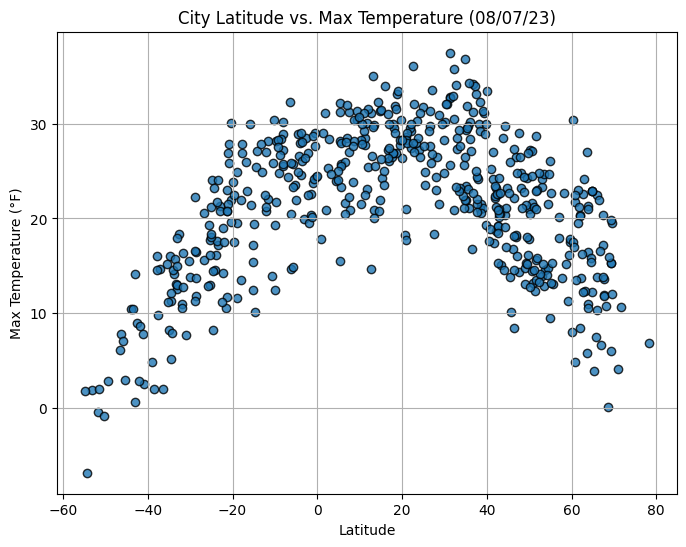

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolors='black', alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

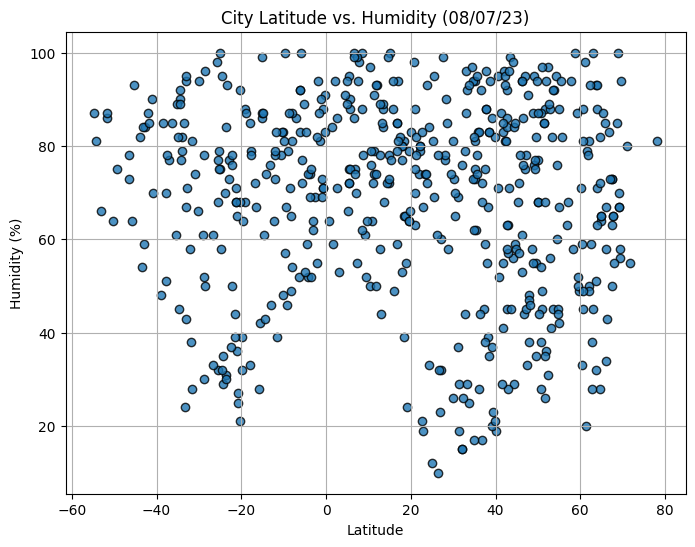

In [11]:
# Build scatter plot for latitude vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolors='black', alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

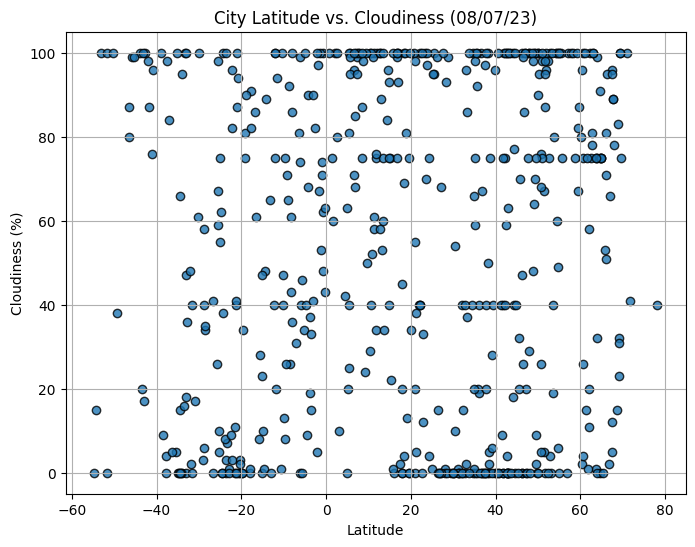

In [12]:
# Build scatter plot for latitude vs. cloudiness
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors='black', alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

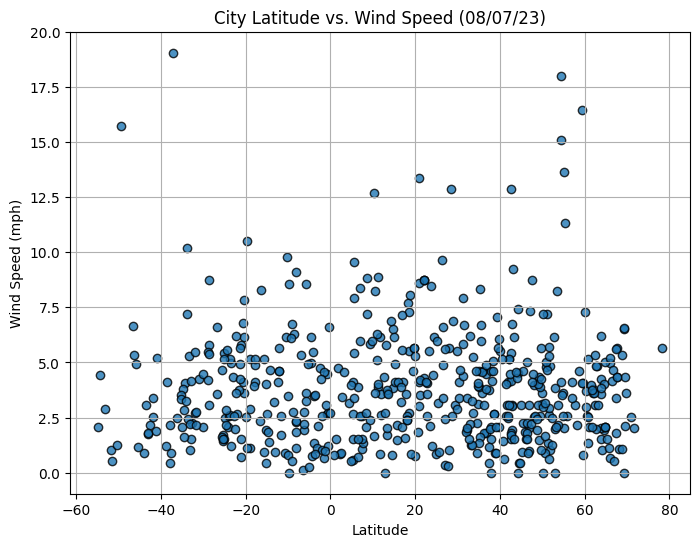

In [13]:
# Build scatter plot for latitude vs. wind speed
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolors='black', alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
city_df = pd.DataFrame(city_data)
northern_hemisphere_df = city_df[city_df['Lat'] >= 0]

# Display the resulting DataFrame


# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,faya-largeau,17.9257,19.1043,29.91,53,45,3.59,TD,2023-08-08 03:33:33
5,iqaluit,63.7506,-68.5145,5.85,93,75,1.54,CA,2023-08-08 03:29:26
6,lisala,2.1500,21.5167,20.90,94,100,0.86,CD,2023-08-08 03:33:34
10,haiku-pauwela,20.9219,-156.3051,28.61,63,20,13.38,US,2023-08-08 03:33:36
11,petropavlovsk-kamchatsky,53.0452,158.6483,23.33,41,0,2.00,RU,2023-08-08 03:33:37


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_df[city_df['Lat'] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,14.16,82,0,7.20,ZA,2023-08-08 03:33:31
1,port-aux-francais,-49.3500,70.2167,2.87,75,38,15.71,TF,2023-08-08 03:33:31
2,blackmans bay,-43.0167,147.3167,14.18,59,17,1.76,AU,2023-08-08 03:33:32
3,barreiro do jaiba,-15.6167,-43.6000,21.43,42,28,0.93,BR,2023-08-08 03:33:32
7,adamstown,-25.0660,-130.1015,21.16,75,55,5.41,PN,2023-08-08 03:33:34


###  Temperature vs. Latitude Linear Regression Plot

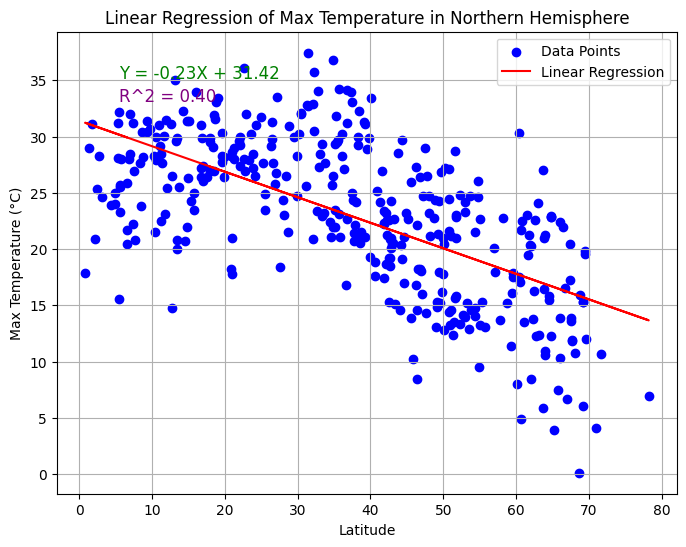

In [16]:
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Max Temp']

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

regress_values = slope * x_values + intercept

equation = f'Y = {slope:.2f}X + {intercept:.2f}'
r_squared = f'R^2 = {r_value**2:.2f}'

plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, color='blue', label='Data Points')
plt.plot(x_values, regress_values, color='red', label='Linear Regression')
plt.title('Linear Regression of Max Temperature in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.text(0.1, 0.9, equation, transform=plt.gca().transAxes, fontsize=12, color='green')
plt.text(0.1, 0.85, r_squared, transform=plt.gca().transAxes, fontsize=12, color='purple')
plt.legend()
plt.grid(True)
plt.show()


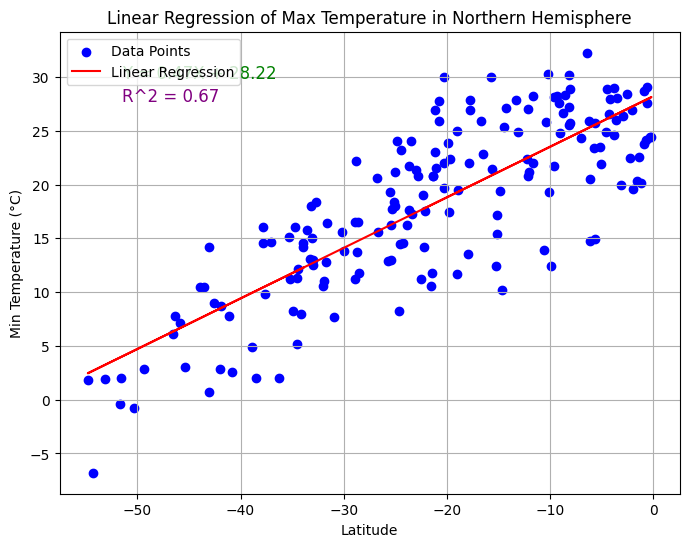

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

regress_values = slope * x_values + intercept

equation = f'Y = {slope:.2f}X + {intercept:.2f}'
r_squared = f'R^2 = {r_value**2:.2f}'

plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, color='blue', label='Data Points')
plt.plot(x_values, regress_values, color='red', label='Linear Regression')
plt.title('Linear Regression of Max Temperature in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Min Temperature (°C)')
plt.text(0.1, 0.9, equation, transform=plt.gca().transAxes, fontsize=12, color='green')
plt.text(0.1, 0.85, r_squared, transform=plt.gca().transAxes, fontsize=12, color='purple')
plt.legend()
plt.grid(True)
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

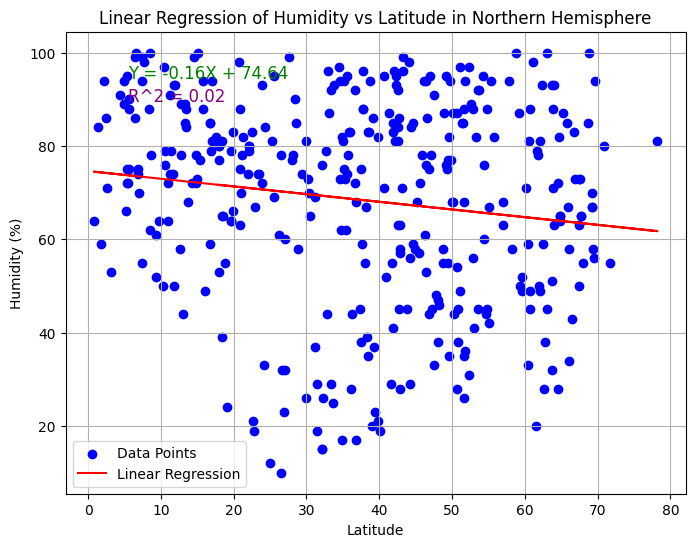

In [18]:
# Northern Hemisphere
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Humidity']

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

regress_values = slope * x_values + intercept

equation = f'Y = {slope:.2f}X + {intercept:.2f}'
r_squared = f'R^2 = {r_value**2:.2f}'

plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, color='blue', label='Data Points')
plt.plot(x_values, regress_values, color='red', label='Linear Regression')
plt.title('Linear Regression of Humidity vs Latitude in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.text(0.1, 0.9, equation, transform=plt.gca().transAxes, fontsize=12, color='green')
plt.text(0.1, 0.85, r_squared, transform=plt.gca().transAxes, fontsize=12, color='purple')

plt.legend()
plt.grid(True)
plt.show()

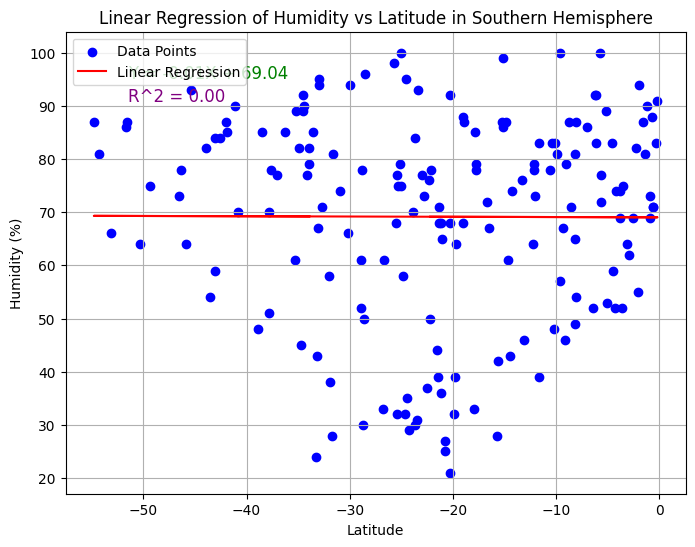

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

regress_values = slope * x_values + intercept

equation = f'Y = {slope:.2f}X + {intercept:.2f}'
r_squared = f'R^2 = {r_value**2:.2f}'

plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, color='blue', label='Data Points')
plt.plot(x_values, regress_values, color='red', label='Linear Regression')
plt.title('Linear Regression of Humidity vs Latitude in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.text(0.1, 0.9, equation, transform=plt.gca().transAxes, fontsize=12, color='green')
plt.text(0.1, 0.85, r_squared, transform=plt.gca().transAxes, fontsize=12, color='purple')

plt.legend()
plt.grid(True)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

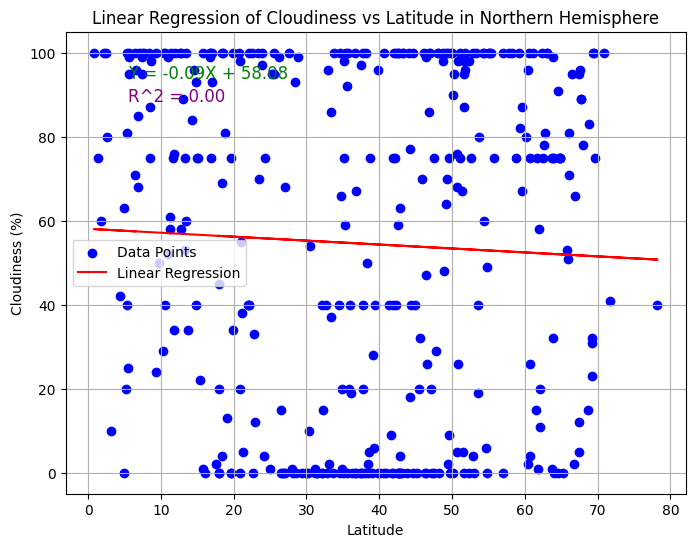

In [20]:
# Northern Hemisphere
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Cloudiness']

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

regress_values = slope * x_values + intercept

equation = f'Y = {slope:.2f}X + {intercept:.2f}'
r_squared = f'R^2 = {r_value**2:.2f}'

plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, color='blue', label='Data Points')
plt.plot(x_values, regress_values, color='red', label='Linear Regression')
plt.title('Linear Regression of Cloudiness vs Latitude in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.text(0.1, 0.9, equation, transform=plt.gca().transAxes, fontsize=12, color='green')
plt.text(0.1, 0.85, r_squared, transform=plt.gca().transAxes, fontsize=12, color='purple')

plt.legend()
plt.grid(True)
plt.show()

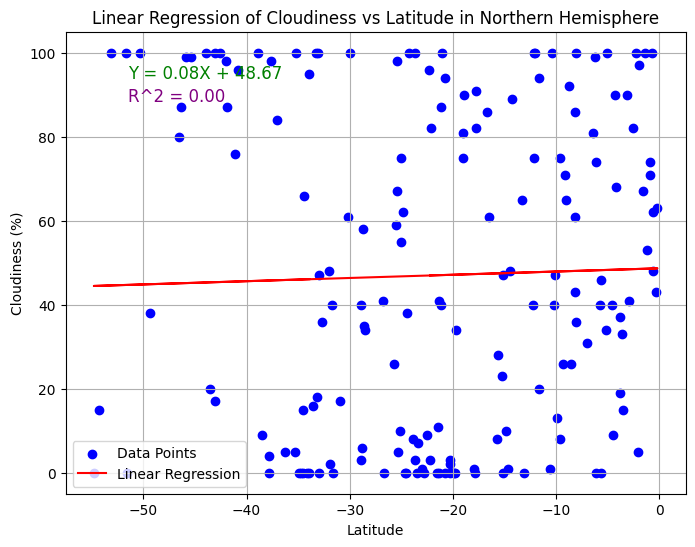

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

regress_values = slope * x_values + intercept

equation = f'Y = {slope:.2f}X + {intercept:.2f}'
r_squared = f'R^2 = {r_value**2:.2f}'

plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, color='blue', label='Data Points')
plt.plot(x_values, regress_values, color='red', label='Linear Regression')
plt.title('Linear Regression of Cloudiness vs Latitude in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.text(0.1, 0.9, equation, transform=plt.gca().transAxes, fontsize=12, color='green')
plt.text(0.1, 0.85, r_squared, transform=plt.gca().transAxes, fontsize=12, color='purple')

plt.legend()
plt.grid(True)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

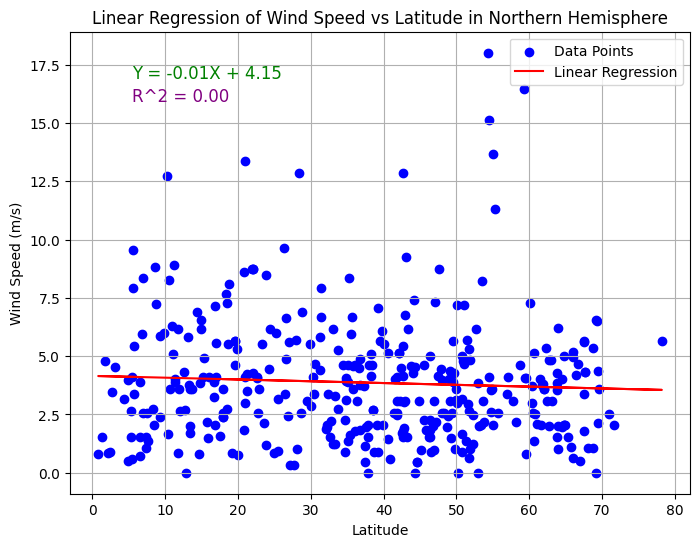

In [22]:
# Northern Hemisphere
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Wind Speed']

# Perform linear regression using linregress
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Calculate the regression line
regress_values = slope * x_values + intercept

# Create the equation of the line
equation = f'Y = {slope:.2f}X + {intercept:.2f}'
r_squared = f'R^2 = {r_value**2:.2f}'

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, color='blue', label='Data Points')
plt.plot(x_values, regress_values, color='red', label='Linear Regression')
plt.title('Linear Regression of Wind Speed vs Latitude in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Adding equation and R-value to the plot
plt.text(0.1, 0.9, equation, transform=plt.gca().transAxes, fontsize=12, color='green')
plt.text(0.1, 0.85, r_squared, transform=plt.gca().transAxes, fontsize=12, color='purple')

plt.legend()
plt.grid(True)
plt.show()

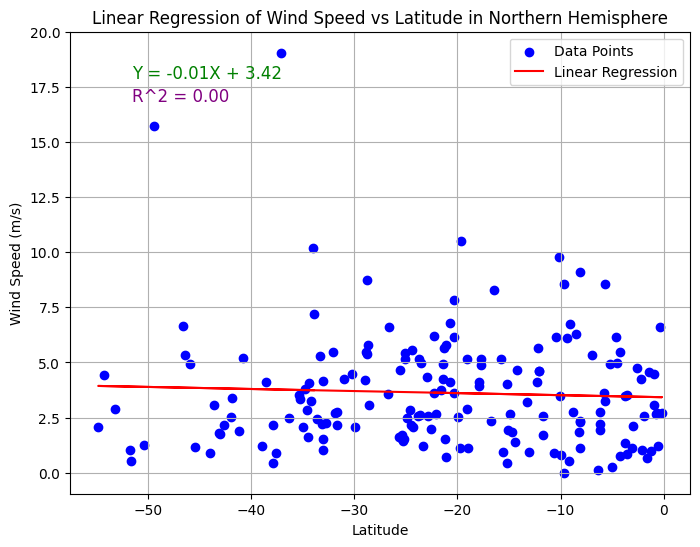

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Perform linear regression using linregress
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Calculate the regression line
regress_values = slope * x_values + intercept

# Create the equation of the line
equation = f'Y = {slope:.2f}X + {intercept:.2f}'
r_squared = f'R^2 = {r_value**2:.2f}'

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, color='blue', label='Data Points')
plt.plot(x_values, regress_values, color='red', label='Linear Regression')
plt.title('Linear Regression of Wind Speed vs Latitude in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Adding equation and R-value to the plot
plt.text(0.1, 0.9, equation, transform=plt.gca().transAxes, fontsize=12, color='green')
plt.text(0.1, 0.85, r_squared, transform=plt.gca().transAxes, fontsize=12, color='purple')

plt.legend()
plt.grid(True)
plt.show()

**Discussion about the linear relationship:** As expected, latitude has a better correlation with temperatures showing that location is a direct cause of temperature variation. For the contrary, there is variation in Cloudiness as the figure shows low precision and accuracy. In the humidity case, the northern hempispher show a better precision showing some relation between latitude and humidity. Finally, wind speed show certain variation but high accuracy that cab interpreted as a good realtion between latitude and wind speed. 
